In [178]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import metrics
import altair
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [179]:
data = pd.read_csv("Excel.csv")
data = data.rename(columns={'left': 'turnover','sales': 'department'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [180]:
new_data= data.drop(columns=['promotion_last_5years','Work_accident','department','last_evaluation'])
new_data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,turnover,salary
0,0.38,2,157,3,1,low
1,0.80,5,262,6,1,medium
2,0.11,7,272,4,1,medium
3,0.72,5,223,5,1,low
4,0.37,2,159,3,1,low


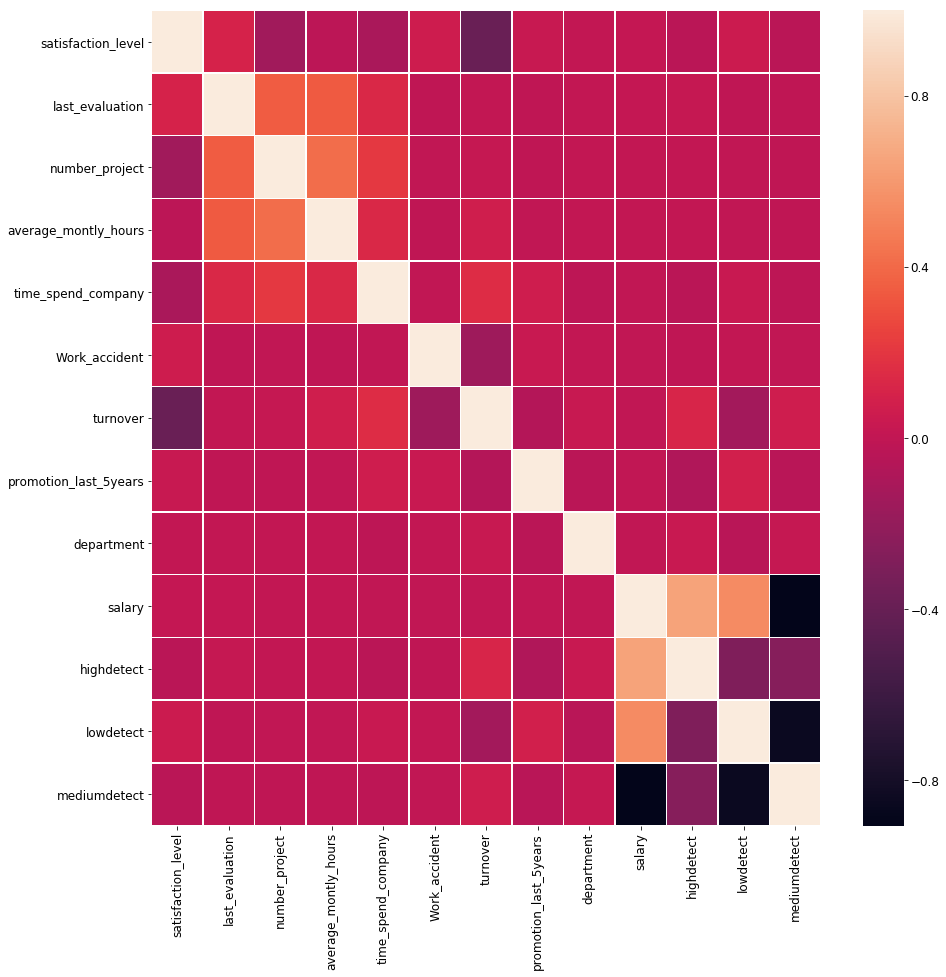

In [422]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), linewidths=.4)

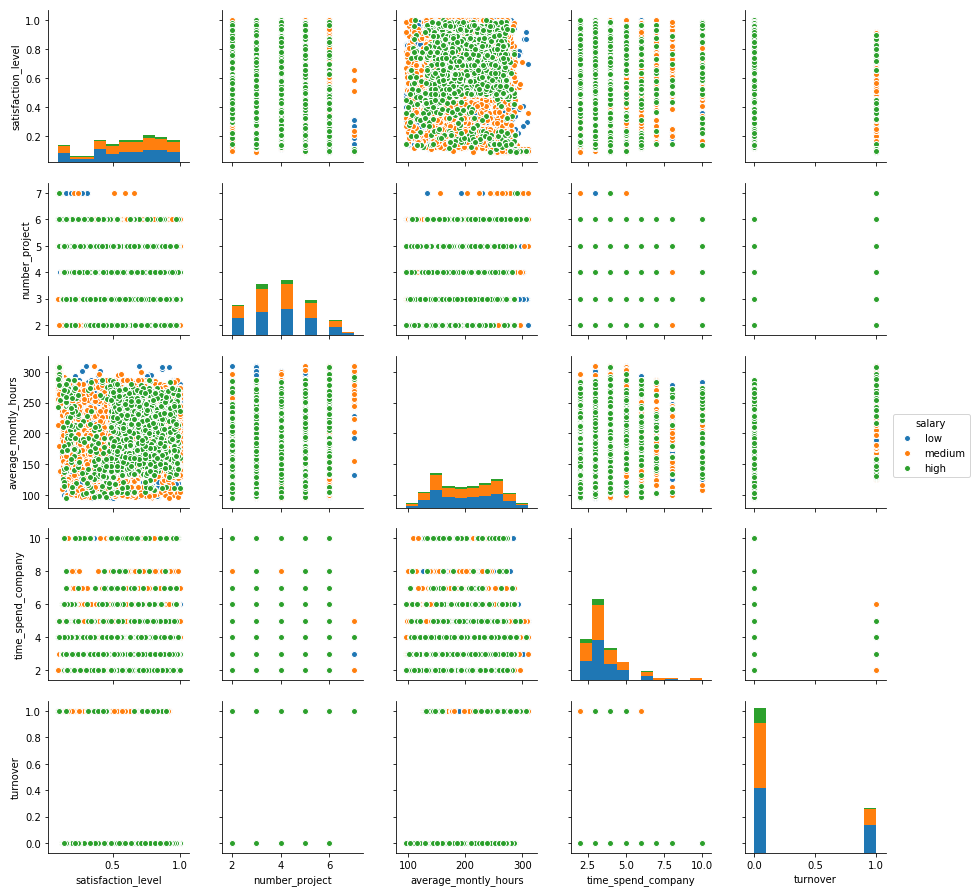

In [181]:
sns.pairplot(new_data,hue='salary')

No visibly strong correlation among the various variables, although I was expecting a correlation between the number of year employees worked at this particular company and their satisfaction level.

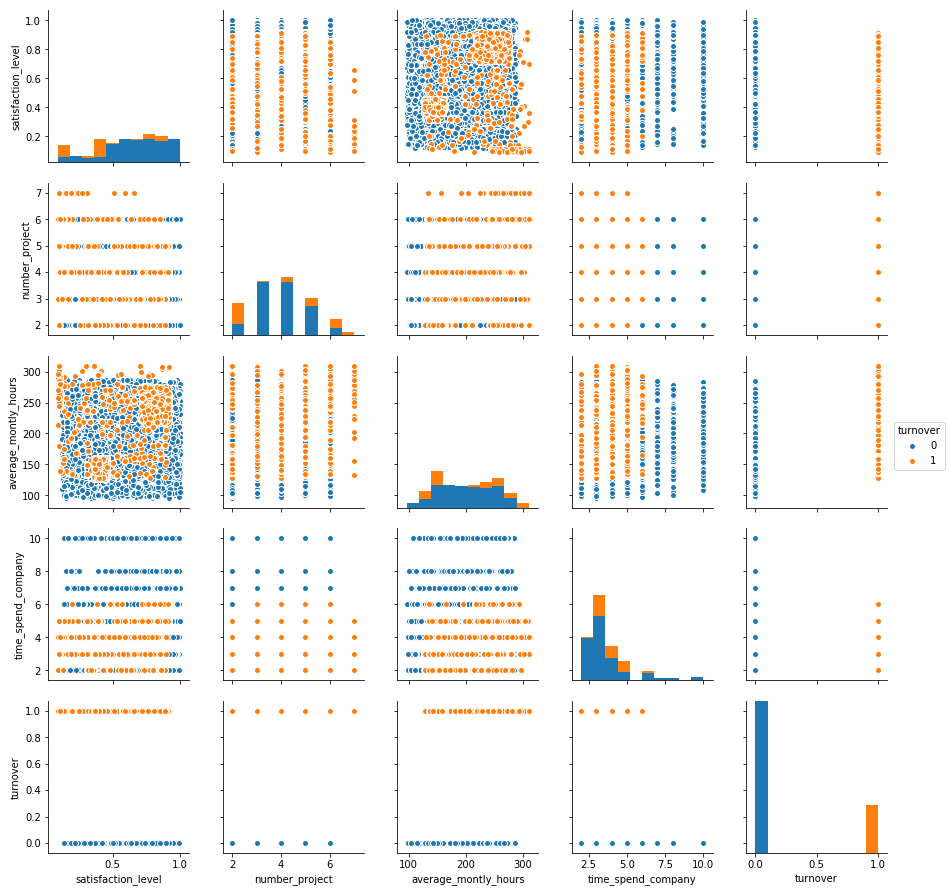

In [182]:
sns.pairplot(new_data,hue='turnover')

In [183]:
data.groupby("salary")["salary"].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

In [184]:
new_data.groupby("salary")["salary"].nunique()
#0-high, 1-low, 2-medium salary

salary
high      1
low       1
medium    1
Name: salary, dtype: int64

In [185]:
dept= pd.crosstab(data.department,data.salary)
dept

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


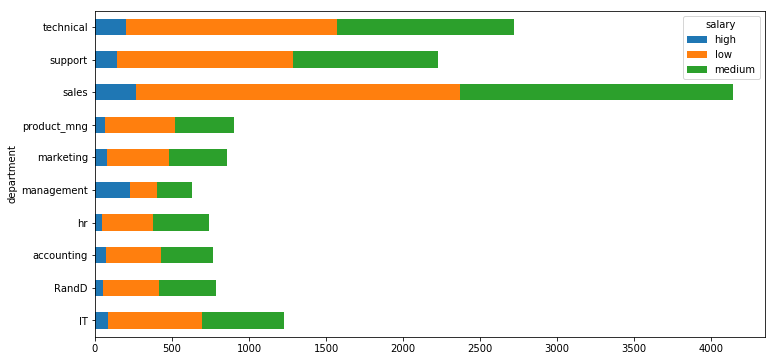

In [186]:
fig, ax = plt.subplots(figsize = (12,6))
pd.crosstab(data.department,data.salary).plot(kind='barh',ax=ax, stacked=True)

Sales has more employees as there is greater range in high, low and medium salary catagory
unfortunately of those making high salary human resource worker have few employees in those category. I was expecting that
most of IT workers to be paid medium to high salary but it is interesting, at least, in this case that not much IT  employee get paid in the higher range salary category.

In [187]:
data.groupby("salary")["salary"].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

In [188]:
number_project = pd.crosstab(data.number_project,new_data.salary)
number_project

salary,high,low,medium
number_project,,,
2,140,1344,904
3,408,1791,1856
4,368,2087,1910
5,245,1317,1199
6,73,633,468
7,3,144,109


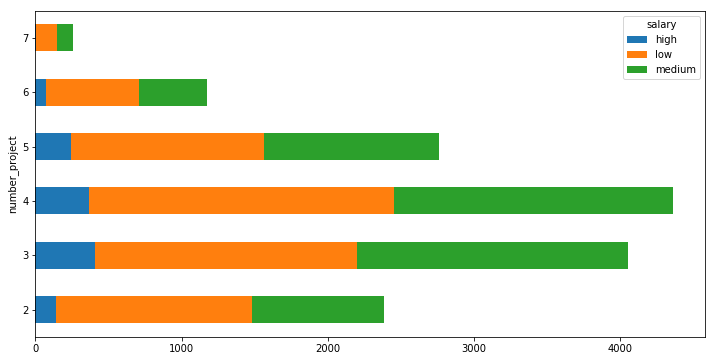

In [189]:
fig, ax = plt.subplots(figsize = (12,6))
pd.crosstab(data.number_project,data.salary).plot(kind='barh',ax=ax, stacked=True)

Employees working 3-4 projects tend to be in the category with higher salary perhaps because there are more employees working 3-4
projects in this particular HR dataset.

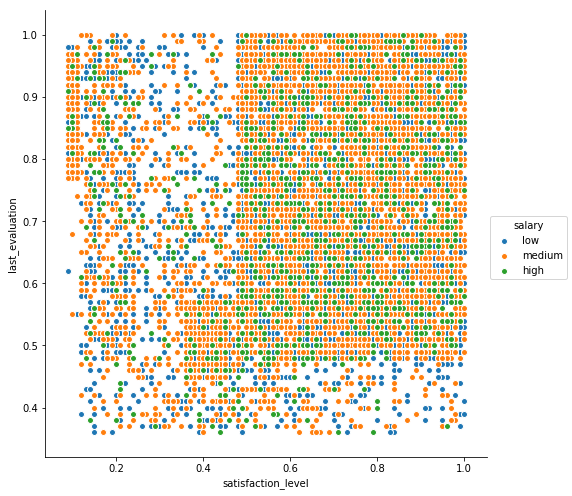

In [190]:
sns.pairplot(x_vars=["satisfaction_level"], y_vars=["last_evaluation"], data=data, hue="salary", size=7)
plt.rcParams['axes.facecolor'] = 'white'

most of employees with high productivity and satisfaction level havehigh medium level salary in this particular dataset. There are 
1237 employees in the high category, 7316 in the low category and 6446 employees in medium category. It is no surprise that workers
in the low category also have lower satisfaction and evaluation score even though there are more employees in low category.



In [191]:
dept_count = data.groupby('department')['salary'].count()
dept_count

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

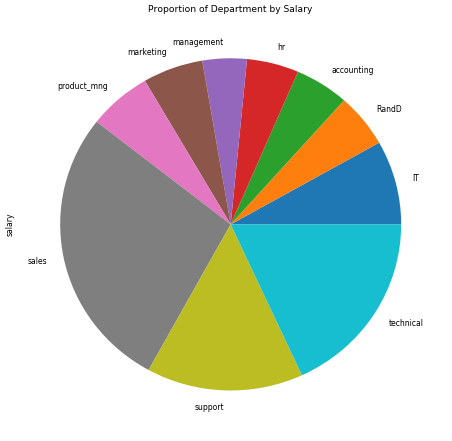

In [192]:
fig = plt.figure(figsize=(10,10), dpi=55)
ax = plt.subplot(111)
dept_count.plot(kind='pie',title='Proportion of Department by Salary', legend=False)

Most employees work in sales department with management having fewer workers.

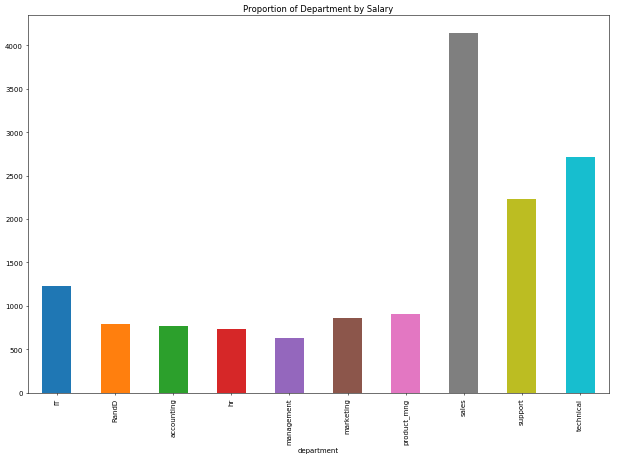

In [193]:
fig = plt.figure(figsize=(15,10), dpi=50)
ax = plt.subplot(111)
dept_count.plot(kind='bar',title='Proportion of Department by Salary', legend=False)

In [236]:
data1 = new_data
labelencoder = LabelEncoder()
for col in data1.columns:
    data1[col] = labelencoder.fit_transform(data[col])
data1.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,turnover,salary
0,29,0,61,1,1,1
1,71,3,166,4,1,2
2,2,5,176,2,1,2
3,63,3,127,3,1,1
4,28,0,63,1,1,1


# Naive Bayes

In [237]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

In [238]:
X = data1.iloc[:,1:4]
y = data1.iloc[:, 5]
y.head()

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int64

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [240]:
model_naive.fit(X_train,y_train)

GaussianNB(priors=None)

In [241]:
pred = model_naive.predict(X_test)

In [242]:
metrics.accuracy_score(y_test, pred)

0.5003333333333333

In [243]:
metrics.confusion_matrix(y_test,pred, labels =[0,1,2])

array([[  18,  177,   24],
       [  14, 1326,  177],
       [  32, 1075,  157]])

In [244]:
print(metrics.classification_report(y_test,pred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.28      0.08      0.13       219
        low       0.51      0.87      0.65      1517
     medium       0.44      0.12      0.19      1264

avg / total       0.47      0.50      0.42      3000



# Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)

In [246]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [247]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [248]:
treePred = model_tree.predict(X_test)
treePred

array([1, 1, 1, ..., 1, 1, 1])

In [249]:
metrics.accuracy_score(y_test, treePred)

0.5156666666666667

In [250]:
metrics.confusion_matrix(y_test,treePred,labels =[0,1,2])

array([[   2,  188,   29],
       [   5, 1453,   59],
       [   3, 1169,   92]])

In [251]:
print(metrics.classification_report(y_test,treePred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.20      0.01      0.02       219
        low       0.52      0.96      0.67      1517
     medium       0.51      0.07      0.13      1264

avg / total       0.49      0.52      0.39      3000



# Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
model_RR = RandomForestClassifier(max_depth =5)

In [253]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [254]:
RRPred = model_RR.predict(X_test)

In [255]:
metrics.accuracy_score(y_test, RRPred)

0.517

In [256]:
metrics.confusion_matrix(y_test,RRPred,labels =[0,1,2])

array([[   0,  185,   34],
       [   0, 1416,  101],
       [   0, 1129,  135]])

In [257]:
print(metrics.classification_report(y_test,RRPred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.00      0.00      0.00       219
        low       0.52      0.93      0.67      1517
     medium       0.50      0.11      0.18      1264

avg / total       0.47      0.52      0.41      3000



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [259]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred_class))

In [260]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1517
2    1264
0     219
Name: salary, dtype: int64

In [261]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[   0  195   24]
 [   0 1487   30]
 [   0 1199   65]]


# Overall how often is the classifier correct or incorrrect

In [262]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[   0  195   24]
 [   0 1487   30]
 [   0 1199   65]]


In [263]:
print((TP + TN) / float(TP + TN + FP + FN))

0.8840665873959572


88% of the time correct

In [264]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.1159334126040428


12% of the time incorrect

# Each against the other
high or low salary
high or medium salary
low or medium salary

In [334]:
data2 = data

In [336]:
#data2["highdetect"] = np.where(data2.salary=="high", 0, 1)
#data2['lowdetect'] = np.where(data2.salary=="low", 0, 1)
#data2["mediumdetect"] = np.where(data2.salary=="medium", 0, 1)

In [272]:
data2.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary,highdetect,lowdetect,mediumdetect
0,29,17,0,61,1,0,1,0,7,1,1,0,1
1,71,50,3,166,4,0,1,0,7,2,1,1,0
2,2,52,5,176,2,0,1,0,7,2,1,1,0
3,63,51,3,127,3,0,1,0,7,1,1,0,1
4,28,16,0,63,1,0,1,0,7,1,1,0,1


In [273]:
labelencoder = LabelEncoder()
for col in data2.columns:
    data2[col] = labelencoder.fit_transform(data2[col])
 
data2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary,highdetect,lowdetect,mediumdetect
0,29,17,0,61,1,0,1,0,7,1,1,0,1
1,71,50,3,166,4,0,1,0,7,2,1,1,0
2,2,52,5,176,2,0,1,0,7,2,1,1,0
3,63,51,3,127,3,0,1,0,7,1,1,0,1
4,28,16,0,63,1,0,1,0,7,1,1,0,1


In [274]:
train, test = train_test_split(data2, test_size =.2)

In [275]:
class GDLogisticRegression:
    """
   
    """
    def __init__(self, learn_rate=0.1):
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((X.shape[0],1)),X]
        pp = X_new_b.dot(self.theta_best)
        logist = 1/(1+np.exp(-1*pp))
        return logist

    def score(self, X, y):
        return np.sum(np.square(self.predict(X)-y))
    
    def fit(self, X, y, n=1000):
        rows,cols = X.shape
        self.theta_best = np.random.rand(cols+1)
        self.scores = []
        res = self.predict(X)
        lastbase = 0
        for i in range(n):
            base = self.score(X, y)
            self.lr = self.lr / 1.005
            for i in range(len(self.theta_best)):
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                    base = s1
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                    base = s2
                lastbase = base
            self.scores.append(base)

In [276]:
lr = GDLogisticRegression(0.1)

In [277]:
lr.fit(train.iloc[:, :9], train.iloc[:, 10], n=120)

In [278]:
preds=lr.predict(test.iloc[:, :9])

In [279]:
highdetect = [1 if x > 0.5 else 0 for x in preds]

In [280]:
metrics.accuracy_score(test.iloc[:, 10], highdetect)

0.917

Higher accuracy score for high vs low detection

In [281]:
metrics.confusion_matrix(test.iloc[:, 10],   highdetect, labels=[0,1,2])

array([[   0,  248,    0],
       [   1, 2751,    0],
       [   0,    0,    0]])

In [282]:
print(classification_report(test.iloc[:, 10], highdetect, target_names=['high','low']))

             precision    recall  f1-score   support

       high       0.00      0.00      0.00       248
        low       0.92      1.00      0.96      2752

avg / total       0.84      0.92      0.88      3000



In [283]:
lr = GDLogisticRegression(0.1)

In [284]:
lr.fit(train.iloc[:, :9], train.iloc[:, 11], n=120)

In [285]:
preds=lr.predict(test.iloc[:, :9])

In [286]:
lowdetect = [1 if x > 0.5 else 0 for x in preds]

In [287]:
metrics.accuracy_score(test.iloc[:, 11], lowdetect)

0.5326666666666666

Average detection between high and medium

In [288]:
metrics.confusion_matrix(test.iloc[:, 11],  lowdetect, labels=[0,1,2])

array([[603, 841,   0],
       [561, 995,   0],
       [  0,   0,   0]])

In [289]:
print(classification_report(test.iloc[:, 11], lowdetect, target_names=['high','medium']))

             precision    recall  f1-score   support

       high       0.52      0.42      0.46      1444
     medium       0.54      0.64      0.59      1556

avg / total       0.53      0.53      0.53      3000



In [290]:
lr = GDLogisticRegression(0.1)

In [291]:
lr.fit(train.iloc[:, :9], train.iloc[:, 12], n=120)

In [292]:
preds=lr.predict(test.iloc[:, :9])

In [293]:
mediumdetect = [1 if x > 0.5 else 0 for x in preds]

In [294]:
metrics.accuracy_score(test.iloc[:, 12], mediumdetect)

0.5406666666666666

Average detection between low and medium

In [295]:
metrics.confusion_matrix(test.iloc[:, 12],  mediumdetect, labels=[0,1,2])

array([[ 354,  954,    0],
       [ 424, 1268,    0],
       [   0,    0,    0]])

In [296]:
print(classification_report(test.iloc[:, 12], mediumdetect, target_names=['low','medium']))

             precision    recall  f1-score   support

        low       0.46      0.27      0.34      1308
     medium       0.57      0.75      0.65      1692

avg / total       0.52      0.54      0.51      3000



Logistic Regression with had better accuracy score detection between high and low

# As salary (high, low, medium) was not binary I proceeded to use Turnover in predicting wether employees leave or stay (0 Present & 1 left)

# Naive Bayes

In [337]:
data1.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,turnover,salary
0,29,0,61,1,1,1
1,71,3,166,4,1,2
2,2,5,176,2,1,2
3,63,3,127,3,1,1
4,28,0,63,1,1,1


In [340]:
X = data1.iloc[:,1:4]
y = data1.iloc[:, 4]
y.head(1)

0    1
Name: turnover, dtype: int64

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [342]:
model_naive.fit(X_train,y_train)

GaussianNB(priors=None)

In [344]:
pred2 = model_naive.predict(X_test)

In [345]:
a= metrics.accuracy_score(y_test, pred2)
a

0.801

In [348]:
aa = metrics.confusion_matrix(y_test,pred, labels =[0,1])
aa

array([[  64, 2012],
       [   0,  566]])

In [349]:
aaa =print(metrics.classification_report(y_test,pred2,target_names =['Present', 'Left']))
aaa

             precision    recall  f1-score   support

    Present       0.81      0.97      0.88      2287
       Left       0.73      0.26      0.38       713

avg / total       0.79      0.80      0.76      3000



Not so Promising True Positive value (<0.5)

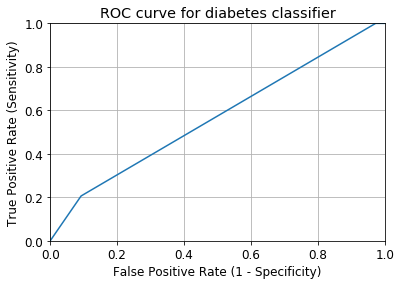

In [366]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Decision Tree

In [360]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)

In [361]:
model_tree.fit(X_train,y_train)
treePred2 = model_tree.predict(X_test)
treePred2

array([0, 1, 0, ..., 0, 1, 1])

In [362]:
b = metrics.accuracy_score(y_test,treePred2)
b

0.9313333333333333

In [363]:
bb =metrics.confusion_matrix(y_test,treePred,labels =[0,1])
bb

array([[  10, 2138],
       [   0,  672]])

In [364]:
print(metrics.classification_report(y_test,treePred2,target_names =['Present', 'Left']))

             precision    recall  f1-score   support

    Present       0.97      0.93      0.95      2287
       Left       0.81      0.92      0.86       713

avg / total       0.94      0.93      0.93      3000



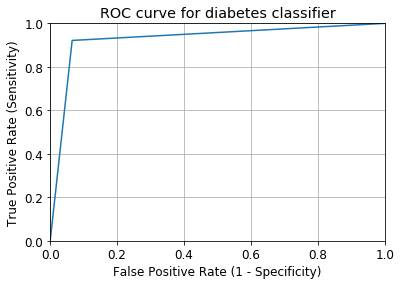

In [365]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, treePred2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Promising True Positive value (>0.8)

In [357]:
#bb = print(metrics.roc_auc_score(y_test, treePred2))
#bb

# Random Forest

In [367]:
from sklearn.ensemble import RandomForestClassifier
model_RR = RandomForestClassifier(max_depth =5)

In [368]:
model_RR.fit(X_train,y_train)
RRPred2 = model_RR.predict(X_test)
RRPred2 

array([0, 1, 0, ..., 0, 1, 1])

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [370]:
c = metrics.accuracy_score(y_test, RRPred2)
c

0.9436666666666667

In [371]:
cc = metrics.confusion_matrix(y_test,RRPred,labels =[0,1])
cc

array([[   0, 2025],
       [   0,  705]])

In [372]:
ccc = print(metrics.classification_report(y_test,RRPred2,target_names =['Present', 'Left']))

             precision    recall  f1-score   support

    Present       0.95      0.98      0.96      2287
       Left       0.93      0.83      0.87       713

avg / total       0.94      0.94      0.94      3000



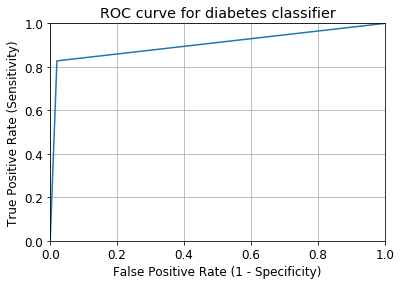

In [373]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, RRPred2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Promising True Positive value (>0.8)

In [374]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [375]:
evaluate_threshold(0.5)

Sensitivity: 0.8274894810659187
Specificity: 0.979886313948404


In [376]:
cc = print(metrics.roc_auc_score(y_test, RRPred2))
cc

0.9036878975071613


# Make DataFrame to Compare Results

In [377]:
dataframe = {'Naive Bayes': pd.Series([a,aa,], index=['Accuracy_Score','AUC_Score']),
             'Decision Tree': pd.Series([b,bb,], index=['Accuracy_Score','AUC_Score']),
             'Random Forest': pd.Series([c,cc,], index=['Accuracy_Score','AUC_Score'])
             }
df = pd.DataFrame(dataframe)
df

,Decision Tree,Naive Bayes,Random Forest
Accuracy_Score,0.931333,0.801,0.943667
AUC_Score,"[[10, 2138], [0, 672]]","[[64, 2012], [0, 566]]",NaN


In [378]:
dataframe = {'Naive Bayes': pd.Series([a,0.61,aa], index=['Accuracy_Score','AUC_Score','Confusion_metrix']),
             'Decision Tree': pd.Series([b,0.92,bb], index=['Accuracy_Score','AUC_Score','Confusion_metrix']),
             'Random Forest': pd.Series([c,0.90,cc], index=['Accuracy_Score','AUC_Score','Confusion_metrix'])
             }
df = pd.DataFrame(dataframe)
df

,Decision Tree,Naive Bayes,Random Forest
Accuracy_Score,0.931333,0.801,0.943667
AUC_Score,0.92,0.61,0.900000
Confusion_metrix,"[[10, 2138], [0, 672]]","[[64, 2012], [0, 566]]",NaN


Random Forest yielded the highest accuracy score and the area under the curve score was promising.
Decision tree had the greates area under the curve score compared to the other models and the accuracy 
score was also satisfactory with decision tree. Naive Bayes has the lowest accuracy score and area under the curve score. In all using turover, whether an employee leaves or stays, was better to 
predict than employee salary. Perhas due the fact that there are a number of variables to consider 
in determining each employees salaries and often distic for each employee, on the other hand satisfactio level and employee work perfomance can easily indicate whether the employee stays of leaves.

# Additional Analysis From MidTerm_Ensemble Method

In [379]:
Desicion_Tree_incorrect = X_test[treePred2 != y_test]
Random_Forestincorrect = X_test[RRPred2 != y_test]
Naive_Bayes_incorrect = X_test[pred2 != y_test]

In [380]:
Total_Incorrect="Total of", len(X_test), "times in test set"
print(Total_Incorrect)

DT_Incorrect = "Decision Tree incorrectly classified", len(Desicion_Tree_incorrect), "times"
print(DT_Incorrect)

RF_Incorrect= "Random forest incorrectly classified", len(Random_Forestincorrect), "times"
print(RF_Incorrect)

NB_Incorrect = "Naive Bayes incorrectly classified", len(Naive_Bayes_incorrect), "times"
print(NB_Incorrect)

('Total of', 3000, 'times in test set')
('Decision Tree incorrectly classified', 206, 'times')
('Random forest incorrectly classified', 169, 'times')
('Naive Bayes incorrectly classified', 597, 'times')


Naive Bayes has the highest incorrect classification, followed by Decion Tree and with less incorrect classification with Random Forest.On the midterm I was able 94% accuracy score with Random Forest, which is the highest compared to the other two methods.
This proves why there was a greater accuracy score with Random and there is lower number of misclassification.

In [381]:
Total_incorrect = pd.concat([Desicion_Tree_incorrect, Random_Forestincorrect, Naive_Bayes_incorrect])
Total_incorrect = len(Total_incorrect)
print(Total_incorrect)
Total_incorrect = incorrect.drop_duplicates()
Total_correct = X_test[~X_test.index.isin(incorrect.index)]
Total_correct= len(Total_correct)
print(Total_correct)

972
1249


There are fewer incorrect classification in comparison to correct classification. The model has correcty classified more than 
incorrect classification.

In [382]:
Total_incorrect.describe()

,number_project,average_montly_hours,time_spend_company
count,1184.000000,1184.000000,1184.000000
mean,1.951014,106.942568,1.853041
std,1.183558,50.040137,1.727513
min,0.000000,1.000000,0.000000
25%,1.000000,65.000000,1.000000
50%,2.000000,110.000000,1.000000
75%,3.000000,149.000000,3.000000
max,5.000000,214.000000,7.000000


(array([ 53.,  97., 142., 144., 144., 141., 175., 171.,  98.,  19.]),
 array([  1. ,  22.3,  43.6,  64.9,  86.2, 107.5, 128.8, 150.1, 171.4,
        192.7, 214. ]),
 <a list of 10 Patch objects>)

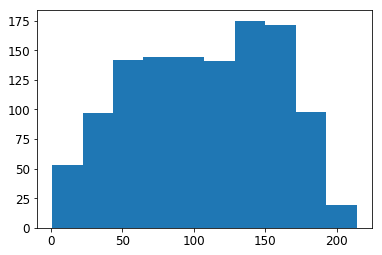

In [383]:
plt.hist(Total_incorrect['average_montly_hours'])

(array([272., 360., 196.,   0., 162., 114.,   0.,  15.,  30.,  35.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

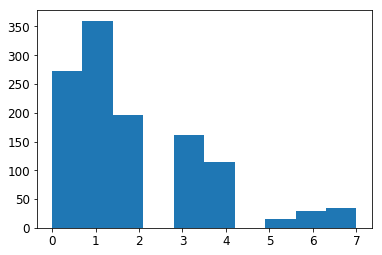

In [384]:
plt.hist(Total_incorrect['time_spend_company'])

Incorrect Classification when time spent at the company is between 2-3 and between 4-5

# Ensemble to Enhance Accuracy

In [413]:
ensemble = VotingClassifier(estimators = [('random forest', model_RR ), ('decision tree', model_tree), ('naive bayes', model_naive)], voting='hard')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [414]:
metrics.accuracy_score(y_test, ensemble_pred)

0.9563333333333334

In [415]:
metrics.confusion_matrix(y_test, ensemble_pred)

array([[2217,   70],
       [  61,  652]])

In [416]:
metrics.roc_auc_score(y_test, ensemble_pred)

0.9419191098415276

In [417]:
print(classification_report(y_test, ensemble_pred, target_names=['Present', 'Left']))

             precision    recall  f1-score   support

    Present       0.97      0.97      0.97      2287
       Left       0.90      0.91      0.91       713

avg / total       0.96      0.96      0.96      3000



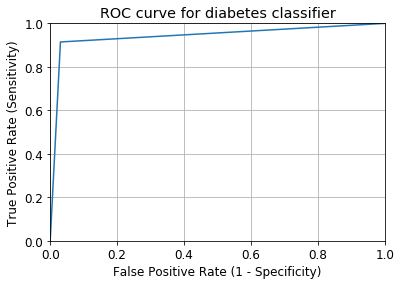

In [418]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, ensemble_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

There is a tremendous improvement with the ensemble voting in comparison to decion tree, random forest and naive bayes. Accuracy
score is 95.6%  and area under the curve score is 94%. On the midterm Random forest had an accuracy score of 93% which is 
very close to the ensemble method. Nevertheless the ensemble method did show improvement and with a better dataset it can be 
applied for greater prediction when determing whether an employee will stay or leave a company based upon attributes such as;
satisfaction level, employer evaluation score, number of promotion within the last few year, the department they work in  and more.